#Develop sift and hog

In [ ]:
#import all of the required libraries
import cv2
import numpy as np
from skimage.feature import hog
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.image as mpimg

In [ ]:
#define a function for plotting the results
#to avoid duplicat code
def show_img(img_path):
  img1 = mpimg.imread(img_path)
  plt.imshow(img1)
  plt.axis('off')
  plt.show()

In [ ]:
#this function will detect HOG features
def hog_feature_detector(img):
    hog_f, hog_i= hog(img, orientations=9, pixels_per_cell=(8, 8),
                                  cells_per_block=(2, 2), block_norm='L2-Hys',
                                  visualize=True, transform_sqrt=True, feature_vector=True,
                                  channel_axis=-1)  # Updated argument name
    return hog_f, hog_i

In [ ]:
#this function will detect sift features
def SIFT_feature_detector(img):
    SIFT = cv2.SIFT_create()
    keypoints, descriptors = SIFT.detectAndCompute(img, None)
    return keypoints, descriptors

In [ ]:
def get_components(image_path):

  main_image = cv2.imread(image_path)
  main_keypoints, main_descriptors = SIFT_feature_detector(main_image)
  main_hog_features, main_hog_image = hog_feature_detector(main_image)
  return main_image, main_keypoints, main_descriptors, main_hog_features, main_hog_image

In [ ]:
#define a function for loading the image 3 which is our main image
#this will avoid some duplicate code
def load_main_image():
  main_image, main_keypoints, main_descriptors, main_hog_features, main_hog_image = get_components('/content/3.0.png')
  return main_image, main_keypoints, main_descriptors, main_hog_features, main_hog_image

In [ ]:
def sift(main_image, main_keypoints, main_descriptors, main_hog_features, images):
    MImg = main_image
    threshold = 10 # for thrasholding if the match is good enough
    #in the following loop we'll be extracting sift features and match them
    for i, image in enumerate(images):
        keypoints,descriptors = SIFT_feature_detector(image)
        bf = cv2.BFMatcher()
        matches = bf.knnMatch(main_descriptors, descriptors, k=2)
        good_matches = []
        for m, n in matches:
            if m.distance < 0.75 * n.distance:
                good_matches.append(m)

        if len(good_matches) > threshold:
            src_pts = np.float32([main_keypoints[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
            dst_pts = np.float32([keypoints[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

            M, mask = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0)
            h, w, d = image.shape
            # determine the size of the corresponding bounding box and plot it
            pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)
            x, y, w, h = cv2.boundingRect(pts)
            MImg = cv2.rectangle(MImg, (x, y), (x + w, y + h), (0, 255, 0), 3)

    return MImg


In [ ]:
def HOG(main_image, main_keypoints, main_descriptors, main_hog_features, images):
    MImg = main_image
    #in this loop we'll be extracting features and then do the matching
    for i, image in enumerate(images):

        hog_features,hog_image = hog_feature_detector(image)
        main_h, main_w, _ = MImg.shape
        crop_h, crop_w, _ = image.shape

        step_size = 32
        min_distance = float('inf')
        best_top_left = None

        for y in range(0, main_h - crop_h, step_size):
            for x in range(0, main_w - crop_w, step_size):
                window = MImg[y:y + crop_h, x:x + crop_w]
                window_hog_features, _ = hog_feature_detector(window)
                #we use euclidean distance for computing the distance between features
                distance = euclidean_distances([hog_features], [window_hog_features])[0][0]

                if distance < min_distance:
                    min_distance = distance
                    best_top_left = (x, y)
        #now we plot the bounding box
        if best_top_left:
            top_left = best_top_left
            bottom_right = (top_left[0] + crop_w, top_left[1] + crop_h)
            cv2.rectangle(MImg, top_left, bottom_right, (255, 0, 0), 3)

    return MImg


#Applying on images

In [ ]:
main_image, main_keypoints, main_descriptors, main_hog_features, main_hog_image = load_main_image()
image_3_1 = []
image_3_1.append(cv2.imread('/content/3.1.png'))

In [ ]:
result_image = sift(main_image, main_keypoints, main_descriptors, main_hog_features, image_3_1)
cv2.imwrite('result_sift_1.png', result_image)


True

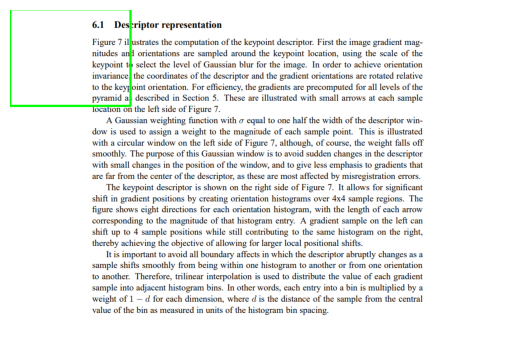

In [ ]:
show_img('/content/result_sift_1.png')

In [ ]:
result_image = HOG(main_image, main_keypoints, main_descriptors, main_hog_features, image_3_1)
cv2.imwrite('result_hog_1.png', result_image)

True

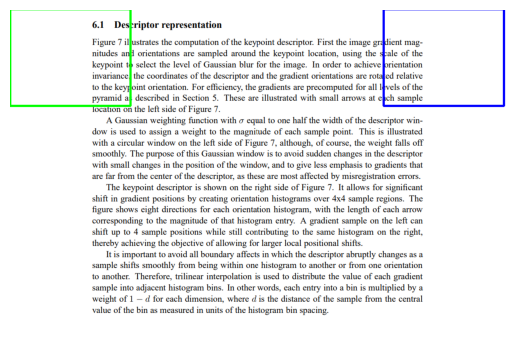

In [ ]:
show_img('/content/result_hog_1.png')

In [ ]:
main_image, main_keypoints, main_descriptors, main_hog_features, main_hog_image = load_main_image()

In [ ]:
image_3_2 = []
image_3_2.append(cv2.imread('/content/3.2.png'))

In [ ]:
result_image = sift(main_image, main_keypoints, main_descriptors, main_hog_features, image_3_2)

In [ ]:
cv2.imwrite('result_sift_2.png', result_image)

True

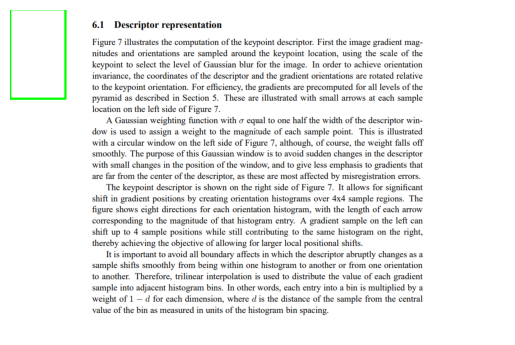

In [ ]:
show_img('/content/result_sift_2.png')

In [ ]:
result_image = HOG(main_image, main_keypoints, main_descriptors, main_hog_features, image_3_2)

In [ ]:
cv2.imwrite('result_hog_2.png', result_image)

True

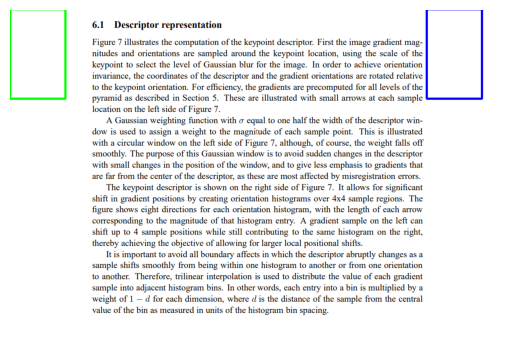

In [ ]:
show_img('/content/result_hog_2.png')

In [ ]:
main_image, main_keypoints, main_descriptors, main_hog_features, main_hog_image = load_main_image()

In [ ]:
image_3_3 = []
image_3_3.append(cv2.imread('/content/3.3.png'))

In [ ]:
result_image = sift(main_image, main_keypoints, main_descriptors, main_hog_features, image_3_3)

In [ ]:
cv2.imwrite('result_sift_3.png', result_image)

True

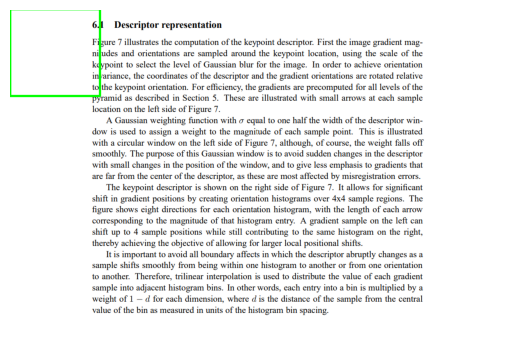

In [ ]:
show_img('/content/result_sift_3.png')

In [ ]:
result_image = HOG(main_image, main_keypoints, main_descriptors, main_hog_features, image_3_3)
cv2.imwrite('result_hog_3.png', result_image)

True

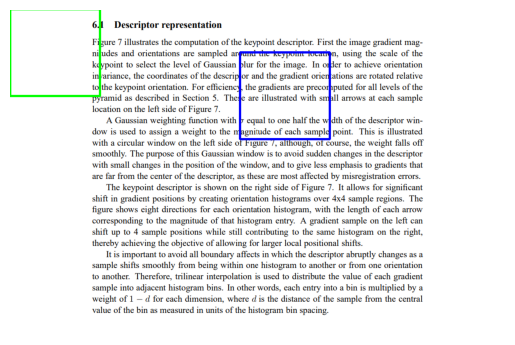

In [ ]:
show_img('/content/result_hog_3.png')

In [ ]:
main_image, main_keypoints, main_descriptors, main_hog_features, main_hog_image = load_main_image()

In [ ]:
image_3_4 = []
image_3_4.append(cv2.imread('/content/3.4.png'))

In [ ]:
result_image = sift(main_image, main_keypoints, main_descriptors, main_hog_features, image_3_4)

In [ ]:
cv2.imwrite('result_sift_4.png', result_image)

True

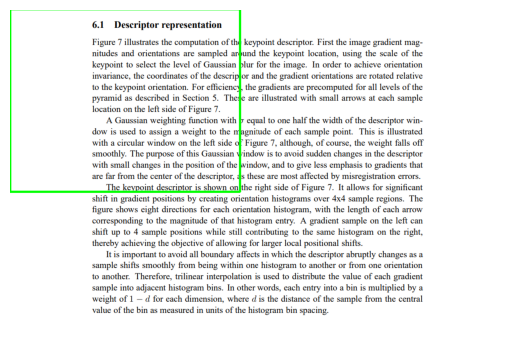

In [ ]:
show_img('/content/result_sift_4.png')

In [ ]:
result_image = HOG(main_image, main_keypoints, main_descriptors, main_hog_features, image_3_4)
cv2.imwrite('result_hog_4.png', result_image)

True

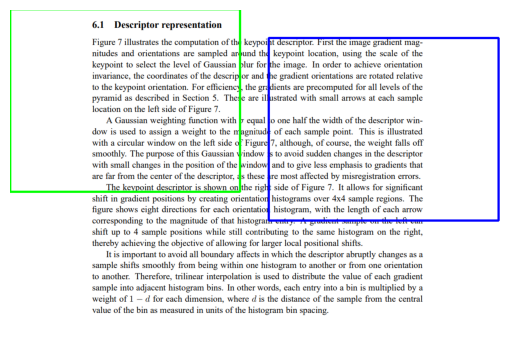

In [ ]:
show_img('/content/result_hog_4.png')